# load libraies

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score


# load data

In [2]:
df_train=pd.read_csv('../input/tabular-playground-series-sep-2021/train.csv')
df_train.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,1
4,4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1


In [3]:
df_train.set_index('id')

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
id,,,,,,,,,,,,,,,,,,,,,
0,0.108590,0.004314,-37.566,0.017364,0.289150,-10.25100,135.12,168900.0,3.992400e+14,86.489,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.10,1.01770,1
1,0.100900,0.299610,11822.000,0.276500,0.459700,-0.83733,1721.90,119810.0,3.874100e+15,9953.600,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.00,0.28359,0
2,0.178030,-0.006980,907.270,0.272140,0.459480,0.17327,2298.00,360650.0,1.224500e+13,15827.000,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.20,0.40690,1
3,0.152360,0.007259,780.100,0.025179,0.519470,7.49140,112.51,259490.0,7.781400e+13,-36.837,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.10,0.51486,1
4,0.116230,0.502900,-109.150,0.297910,0.344900,-0.40932,2538.90,65332.0,1.907200e+15,144.120,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957914,0.098979,0.202530,2192.100,0.348010,0.276430,-0.84065,2214.20,26246.0,1.061600e+15,10882.000,...,-51.2970,1.7323,20.76300,14.74400,27415.00,1.2160,2.139400e+13,2612.00,0.42597,0
957915,0.134930,0.413600,1050.100,0.000521,-0.001246,1.76990,3519.90,862290.0,7.321400e+13,2869.000,...,-41.4180,2.6986,-1.09760,-1.09980,13826.00,1.3320,1.829400e+17,3300.50,0.92974,1
957916,0.104660,0.473510,2415.400,0.252230,0.196970,-0.82323,3044.90,13832.0,2.693300e+12,2294.700,...,-15.9670,1.6843,1.07590,16.64600,8655.10,1.1113,1.925800e+16,297.61,0.91446,0


# handle missing value

In [4]:
df_train.isnull().sum().sum()
df_train=df_train.fillna(df_train.mean())
df_train.isnull().sum().sum()

0

In [5]:
#def drop_outliers(df,field_name):
    #iqr=1.5*(np.percentile(df[field_name],75)-np.percentile(df[field_name],25))
    #df.drop(df[df[field_name]>(iqr+np.percentile(df[field_name],75))].index,inplace=True)
    #df.drop(df[df[field_name]<(np.percentile(df[field_name],25)-iqr)].index,inplace=True)

In [6]:
#drop_outliers(df_train,'f118')

In [7]:
X=df_train.iloc[:, 0:119].values

In [8]:
y=df_train['claim']

In [9]:
y=y.astype('int')

In [10]:
from sklearn import preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler



In [12]:
scaler=StandardScaler()

In [13]:
X = scaler.fit_transform(X.astype(float))

# train test split

In [14]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

# Are calsses balance

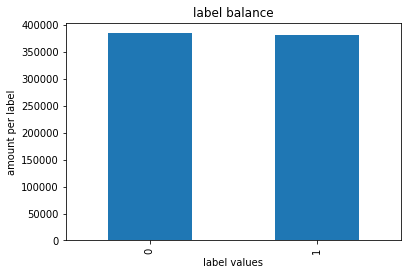

In [15]:
y_train.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

# Scale Data

In [16]:
#from sklearn.decomposition import PCA

In [17]:
#pca = PCA()


In [18]:
#comp = pca.fit(X_train)

In [19]:
#plt.plot(np.cumsum(comp.explained_variance_ratio_))
#plt.grid()
#plt.xlabel('Number of Principal Components')
#plt.ylabel('Explained Variance')
#sns.despine()

In [20]:
#pca = PCA(n_components=50).fit(X_train)
#train_x_transform = pca.transform(X_train)

In [21]:
#from sklearn.model_selection import GridSearchCV

# estimator = XGBClassifier(
   # objective= 'binary:logistic',
   # nthread=4,
   # seed=42
)

In [22]:
#parameters = {
    #'max_depth': range (2, 10, 1),
    #'n_estimators': range(60, 220, 40),
    #'learning_rate': [0.1, 0.01, 0.05]
#}

In [23]:
#grid_search = GridSearchCV(
    #estimator=estimator,
    #param_grid=parameters,
    #scoring = 'roc_auc',
    #n_jobs = 10,
    #cv = 10,
    #verbose=True
#)

In [24]:
#grid_search.fit(X_train, y_train)


In [25]:
#grid_search.best_estimator_


# Define model

In [26]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


In [27]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [28]:
y_pred = model.predict(X_test)


In [29]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7180140303991983

# Use samole data to get competition result

In [30]:

df_test=pd.read_csv("../input/tabular-playground-series-sep-2021/test.csv")
df_test.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
0,957919,0.165850,0.487050,1295.00,0.02310,0.31900,0.90188,573.29,3743.7,2.705700e+12,...,0.16253,-22.1890,2.0655,0.430880,-10.7410,81606.0,1.1940,1.980400e+14,2017.1,0.46357
1,957920,0.129650,0.373480,1763.00,0.72884,0.33247,-1.26310,875.55,554370.0,5.955700e+14,...,0.81528,-1.6342,1.5736,-1.071200,11.8320,90114.0,1.1507,4.388000e+16,6638.9,0.28125
2,957921,0.120190,0.445210,736.26,0.04615,0.29605,0.31665,2659.50,317140.0,3.977800e+14,...,0.81831,-32.7800,2.1364,-1.931200,-3.2804,37739.0,1.1548,1.718100e+14,5844.0,0.13797
3,957922,0.054008,0.395960,996.14,0.85934,0.36678,-0.17060,386.56,325680.0,-3.432200e+13,...,0.86559,-2.4162,1.5199,-0.011633,1.3840,26849.0,1.1490,2.138800e+17,6173.3,0.32910
4,957923,0.079947,-0.006919,10574.00,0.34845,0.45008,-1.84200,3027.00,428150.0,9.291500e+11,...,0.25190,-18.6300,3.7387,0.757080,-4.9405,50336.0,1.2488,2.151300e+17,2250.1,0.33796


In [31]:
df_test.set_index('id')

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
id,,,,,,,,,,,,,,,,,,,,,
957919,0.165850,0.487050,1295.00,0.023100,0.31900,0.901880,573.29,3743.7,2.705700e+12,6221.000000,...,0.162530,-22.1890,2.0655,0.430880,-10.7410,81606.00,1.1940,1.980400e+14,2017.10,0.46357
957920,0.129650,0.373480,1763.00,0.728840,0.33247,-1.263100,875.55,554370.0,5.955700e+14,934.430000,...,0.815280,-1.6342,1.5736,-1.071200,11.8320,90114.00,1.1507,4.388000e+16,6638.90,0.28125
957921,0.120190,0.445210,736.26,0.046150,0.29605,0.316650,2659.50,317140.0,3.977800e+14,131.810000,...,0.818310,-32.7800,2.1364,-1.931200,-3.2804,37739.00,1.1548,1.718100e+14,5844.00,0.13797
957922,0.054008,0.395960,996.14,0.859340,0.36678,-0.170600,386.56,325680.0,-3.432200e+13,-26.473000,...,0.865590,-2.4162,1.5199,-0.011633,1.3840,26849.00,1.1490,2.138800e+17,6173.30,0.32910
957923,0.079947,-0.006919,10574.00,0.348450,0.45008,-1.842000,3027.00,428150.0,9.291500e+11,5999.400000,...,0.251900,-18.6300,3.7387,0.757080,-4.9405,50336.00,1.2488,2.151300e+17,2250.10,0.33796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451388,-0.009112,0.308190,637.64,0.778200,0.41415,-1.068500,651.22,985000.0,6.079700e+15,508.820000,...,0.249550,-17.5100,2.3325,0.112260,-5.9238,NaN,1.1559,8.163900e+16,857.09,1.56330
1451389,0.088922,0.482650,6924.10,0.025963,0.35540,-0.870200,2514.20,18004.0,6.073500e+14,-0.008665,...,0.017970,-7.8690,1.7005,97.813000,4.3793,-2432.00,1.0707,4.691800e+16,7497.10,0.67075
1451390,0.140620,0.484750,1797.10,0.147020,0.28803,-1.407100,434.03,333050.0,2.351000e+15,33492.000000,...,0.013841,-5.3824,1.6827,NaN,8.0633,2471.40,1.1725,7.900900e+16,2904.60,0.18005


In [32]:
df_test.isnull().sum().sum()
df_test=df_test.fillna(df_test.mean())
df_test.isnull().sum().sum()

0

In [33]:
y_pred_test = model.predict(df_test)


In [34]:
df_test.head(5)

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
0,957919,0.165850,0.487050,1295.00,0.02310,0.31900,0.90188,573.29,3743.7,2.705700e+12,...,0.16253,-22.1890,2.0655,0.430880,-10.7410,81606.0,1.1940,1.980400e+14,2017.1,0.46357
1,957920,0.129650,0.373480,1763.00,0.72884,0.33247,-1.26310,875.55,554370.0,5.955700e+14,...,0.81528,-1.6342,1.5736,-1.071200,11.8320,90114.0,1.1507,4.388000e+16,6638.9,0.28125
2,957921,0.120190,0.445210,736.26,0.04615,0.29605,0.31665,2659.50,317140.0,3.977800e+14,...,0.81831,-32.7800,2.1364,-1.931200,-3.2804,37739.0,1.1548,1.718100e+14,5844.0,0.13797
3,957922,0.054008,0.395960,996.14,0.85934,0.36678,-0.17060,386.56,325680.0,-3.432200e+13,...,0.86559,-2.4162,1.5199,-0.011633,1.3840,26849.0,1.1490,2.138800e+17,6173.3,0.32910
4,957923,0.079947,-0.006919,10574.00,0.34845,0.45008,-1.84200,3027.00,428150.0,9.291500e+11,...,0.25190,-18.6300,3.7387,0.757080,-4.9405,50336.0,1.2488,2.151300e+17,2250.1,0.33796


In [35]:
df_test['claim'] = y_pred_test


In [36]:
df_test_new = df_test[['id', 'claim']]


In [37]:
df_test_new.head(5)

,id,claim
0,957919,1
1,957920,0
2,957921,0
3,957922,1
4,957923,1


In [38]:
df_test_new.set_index('id')

,claim
id,
957919,1
957920,0
957921,0
957922,1
957923,1
...,...
1451388,1
1451389,0
1451390,1


In [39]:
sample_solution3=df_test_new.to_csv("sample_solution5.csv")


In [40]:
#from sklearn.linear_model import LogisticRegression


In [41]:
#logreg = LogisticRegression()


In [42]:
#from sklearn.linear_model import LogisticRegression
#from sklearn import metrics

#logreg = LogisticRegression()
#logreg.fit(X_train, y_train)

In [43]:
#y_pred = logreg.predict(X_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [44]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)